# import the libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
#no scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# General info and some preproccesing of our data 

In [3]:
data = pd.read_csv('Churn Modeling.csv')
data.columns = [i.lower().replace(' ','_') for i in data.columns]

In [4]:
data.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [7]:
data.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [8]:
# we dont need surename and row id so we will drop them

data.drop(columns=['rownumber','surname','customerid'],inplace=True)

In [9]:
data.shape

(10000, 11)

In [10]:
# check if the numbers of classes are even 
data.exited.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

### they are not but those are the data he have so we will work with them 

## Now we will try to find why are the customers exiting 

# First we will try to see visualy  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

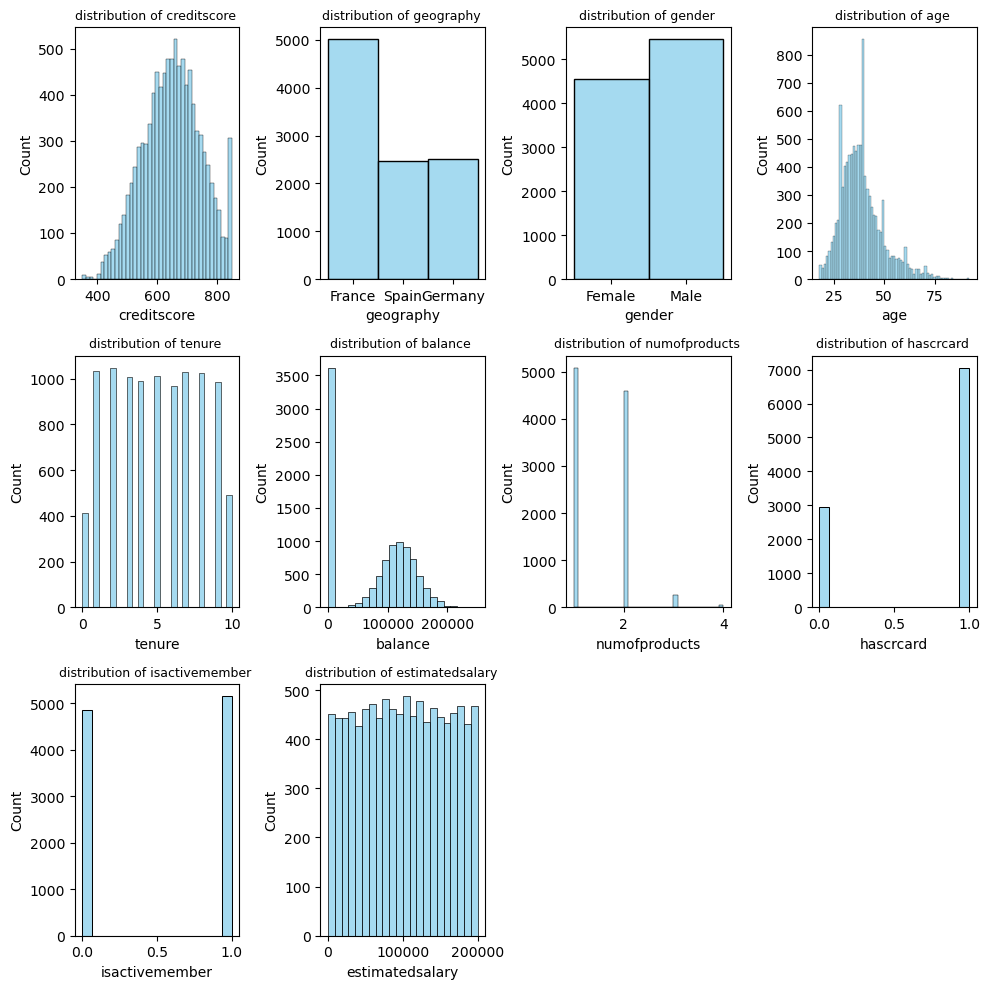

In [12]:
#plot the distributions
columns = data.drop('exited',axis=1).columns
cols = [i for i in columns]

plt.figure(figsize=(10,10))
for column in cols :
    plt.subplot(3,4,cols.index(column)+1)
    sns.histplot(data[column],color='skyblue')
    plt.title(f'distribution of {column} ',fontsize=9)
plt.tight_layout()
plt.show()
    
    

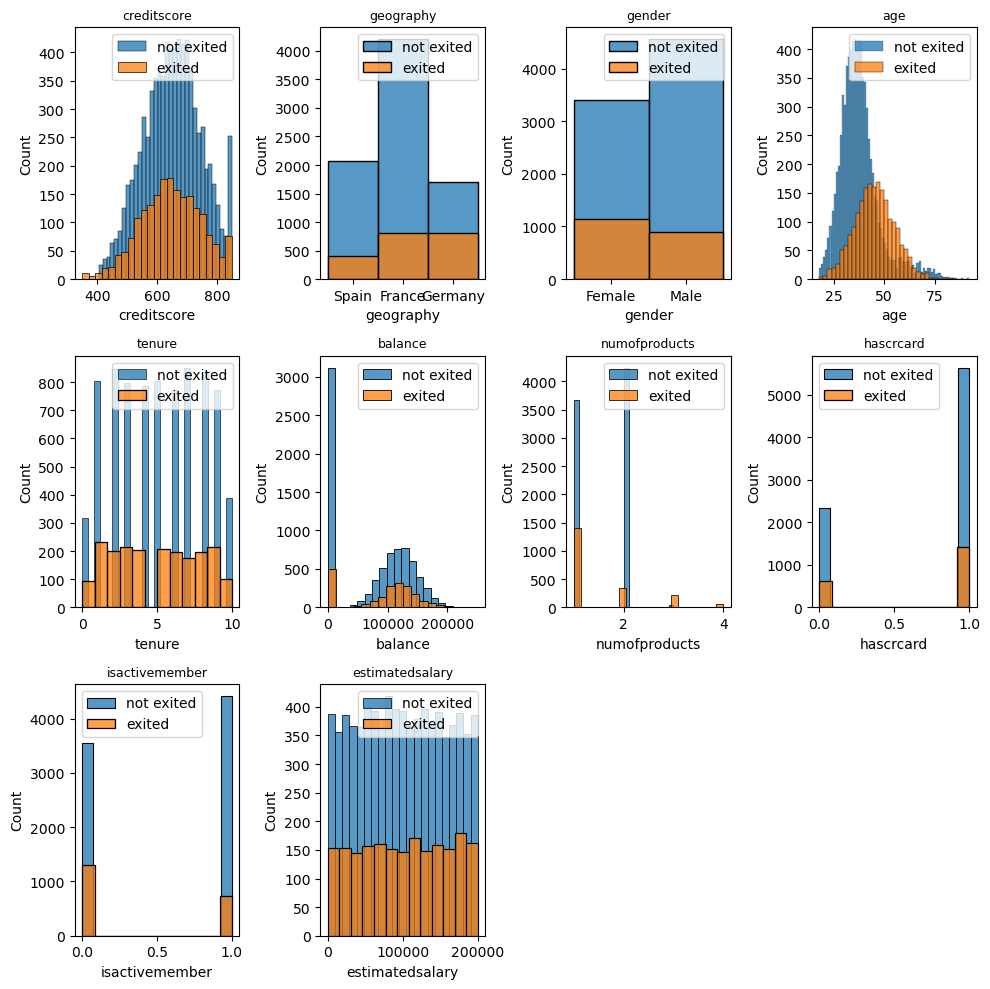

In [13]:
# now lets plot the distributions for each class

plt.figure(figsize=(10,10))
for column in cols:
    plt.subplot(3,4,cols.index(column)+1)
    sns.histplot(data.loc[data['exited'] == 0,column] , label='not exited')
    sns.histplot(data.loc[data['exited'] == 1,column] , label='exited')
    plt.title (column,fontsize=9)
    plt.legend()
plt.tight_layout()
plt.show()
    

### as a first observation we can see that geography, gender and age have an important role in people exiting 
### we cant say for all variables because some of them are in a large area and the plots cant say much

# Now we will use t_tests to see if  there is a significant diferent between the means for each variable for each class (exited or no)

## for numeric variables we will use two sampled t-tests

In [14]:
import scipy.stats as stats

In [15]:
data_num = data.select_dtypes(include=np.number)

In [16]:
left = data_num.loc[data_num['exited'] == 1]
stayed = data_num.loc[data_num['exited'] == 0]


In [17]:
p_values = []
awnsers =  []
columns = data_num.drop(columns=['exited']).columns
columns = [i for i in columns]
for column in columns:
    mean_left = left[column].mean()
    mean_stayed = stayed[column].mean()
    print(f'mean for variable {column} when exited = {mean_left} and when stayed : {mean_stayed}')
    awnser =  stats.ttest_ind(a= left[column],b= stayed[column] ,equal_var=False)
    p_values.append(f'variable {column} gave the following statistics : {awnser}.format')
    awnsers.append([column,awnser])

mean for variable creditscore when exited = 645.3514972999509 and when stayed : 651.8531960316463
mean for variable age when exited = 44.8379970544919 and when stayed : 37.40838879819164
mean for variable tenure when exited = 4.932744231713304 and when stayed : 5.033278914981791
mean for variable balance when exited = 91108.53933726068 and when stayed : 72745.2967788522
mean for variable numofproducts when exited = 1.4752086401570939 and when stayed : 1.5442672359663443
mean for variable hascrcard when exited = 0.6990672557682867 and when stayed : 0.7071455481602411
mean for variable isactivemember when exited = 0.36082474226804123 and when stayed : 0.5545648624890117
mean for variable estimatedsalary when exited = 101465.67753068237 and when stayed : 99738.39177194524


In [18]:
p_values

['variable creditscore gave the following statistics : TtestResult(statistic=-2.6346605436575796, pvalue=0.008464728991832862, df=3050.895535490558).format',
 'variable age gave the following statistics : TtestResult(statistic=30.419197204406792, pvalue=4.7127272656641046e-179, df=3248.052835708304).format',
 'variable tenure gave the following statistics : TtestResult(statistic=-1.384328819131246, pvalue=0.16635698992884443, df=3113.84809185945).format',
 'variable balance gave the following statistics : TtestResult(statistic=12.471280320050688, pvalue=6.318663518527974e-35, df=3347.82845302613).format',
 'variable numofproducts gave the following statistics : TtestResult(statistic=-3.701997887883855, pvalue=0.00021858494460549394, df=2471.964551090773).format',
 'variable hascrcard gave the following statistics : TtestResult(statistic=-0.710329153715085, pvalue=0.4775528097988775, df=3139.1747969844373).format',
 'variable isactivemember gave the following statistics : TtestResult(st

In [19]:
results = []
for i in range(len(awnsers)):
    print(f'{(awnsers[i][1][1]):.9f} , {awnsers[i][0]}')
    results.append(f'{(awnsers[i][1][1]):.9f} , {awnsers[i][0]}')

0.008464729 , creditscore
0.000000000 , age
0.166356990 , tenure
0.000000000 , balance
0.000218585 , numofproducts
0.477552810 , hascrcard
0.000000000 , isactivemember
0.228924613 , estimatedsalary


### p-values is the propability of the means coming from the same distribution, so the smaller the p-value the smaller the porpability 

## for cateogorical vairables we will use chi squared tests 

In [20]:
countries = data[['geography','exited']]

In [21]:
genders = data[['gender','exited']]

In [22]:
countries = pd.crosstab(countries.geography,countries.exited)

In [23]:
countries

exited,0,1
geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [24]:
awnser = stats.chi2_contingency(countries)
awnser

Chi2ContingencyResult(statistic=301.25533682434536, pvalue=3.8303176053541544e-66, dof=2, expected_freq=array([[3992.6482, 1021.3518],
       [1997.9167,  511.0833],
       [1972.4351,  504.5649]]))

In [25]:
print(f'{(awnser[1]):.9f} ,country')
results.append(f'{(awnser[1]):.9f} ,country')

0.000000000 ,country


In [26]:
genders = pd.crosstab(genders['gender'],genders.exited)
awnser = stats.chi2_contingency(genders)


In [27]:
print(f'{(awnser[1]):.9f} ,gender')
results.append(f'{(awnser[1]):.9f} ,gender')

0.000000000 ,gender


In [28]:
## now lets see the results : 
for i in results:
    print(i)

0.008464729 , creditscore
0.000000000 , age
0.166356990 , tenure
0.000000000 , balance
0.000218585 , numofproducts
0.477552810 , hascrcard
0.000000000 , isactivemember
0.228924613 , estimatedsalary
0.000000000 ,country
0.000000000 ,gender


##  Very strong indicators for a person to exit are:
###    age,gender,country,balace,isactivemember 
### strong indicators for a person to exit are : 
###    number of products and credit score 

## lets verify that using correlation

### but first make the categorical columns to numeric ones
### in a new dataframe


In [29]:
df = data.copy(deep=True)

In [30]:



def cat_to_num(variable):
    uniques  = data[variable].unique()
    replacements = [i+1 for i in range(len(uniques))]
    data[variable].replace(uniques,replacements,inplace=True)
    
cat_to_num('geography')
cat_to_num('gender')

In [31]:
data.head(4)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,1,1,42,2,0.000,1,1,1,101348.880,1
1,608,2,1,41,1,83807.860,1,0,1,112542.580,0
2,502,1,1,42,8,159660.800,3,1,0,113931.570,1
3,699,1,1,39,1,0.000,2,0,0,93826.630,0


## now see the correlations !

Text(0.5, 1.0, 'correlations')

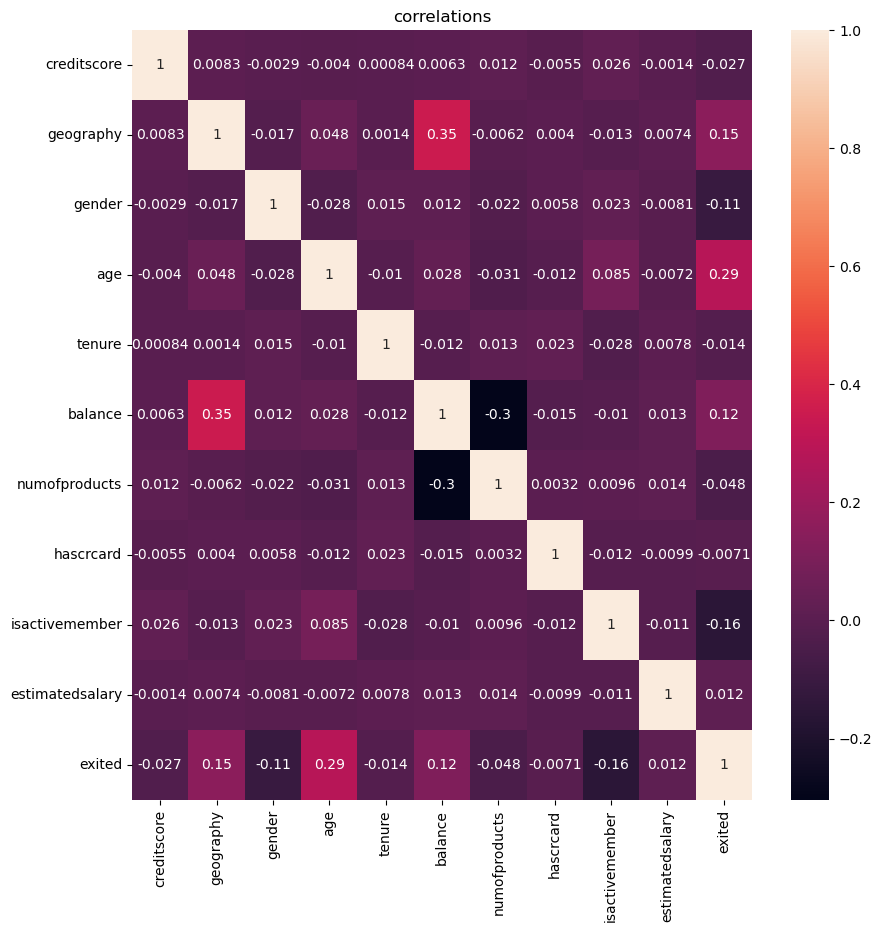

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.title('correlations')


In [33]:
Indicators = pd.DataFrame(data.corr()['exited']).reset_index().rename(columns={'index':'variable','exited':'correlation'})
Indicators['correlation'] = abs(Indicators['correlation'])
Indicators.drop(index=10,inplace=True)
Indicators.sort_values(by='correlation',ascending=False,inplace=True)

In [34]:
Indicators

,variable,correlation
3,age,0.285
8,isactivemember,0.156
1,geography,0.154
5,balance,0.119
2,gender,0.107
6,numofproducts,0.048
0,creditscore,0.027
4,tenure,0.014
9,estimatedsalary,0.012
7,hascrcard,0.007


####  previous asamptions were correct

# now lets find out exactly whats happening for each variable 

### starting with gender 

In [35]:
x = df.gender.value_counts()
y = df.loc[df['exited'] == 1,'gender'].value_counts()


In [36]:
x

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [37]:
y

gender
Female    1139
Male       898
Name: count, dtype: int64

In [38]:
man_ratio = y[1]/x[0]
woman_ratio = y[0]/x[1]

C:\Users\mplan\AppData\Local\Temp\ipykernel_6620\3576059141.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  man_ratio = y[1]/x[0]
C:\Users\mplan\AppData\Local\Temp\ipykernel_6620\3576059141.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  woman_ratio = y[0]/x[1]


In [39]:
genders = ['woman','man']
ratios =pd.DataFrame({'genders':genders,'ratios' :[woman_ratio,man_ratio]})

In [40]:
ratios

,genders,ratios
0,woman,0.251
1,man,0.165


In [41]:
print(f'woman ratio of leaving = {woman_ratio}, man ratio of leaving = {man_ratio}')

woman ratio of leaving = 0.2507153863086066, man ratio of leaving = 0.16455928165658787


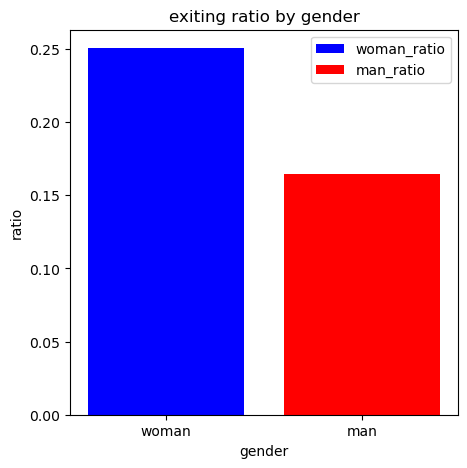

In [42]:
plt.figure(figsize=(5,5))
plt.bar(ratios['genders'][0],ratios['ratios'][0],label='woman_ratio',color='b')
plt.bar(ratios['genders'][1],ratios['ratios'][1],label='man_ratio',color='r')
plt.legend()
plt.title('exiting ratio by gender')
plt.xticks(['woman','man'])
plt.xlabel('gender')
plt.ylabel('ratio')
plt.savefig('gender.png')
plt.show()


### women exiting with a higher ratio than men 


## age 

In [43]:
df.age.max()

92

In [44]:
df.age.min()

18

In [45]:
### first lets group the ages by 10 years
new_age = []
years = data.age.values
for ages in years:
    if ages > 17 and ages < 20:
        new_ages = 1
    elif ages >= 20 and ages< 30 :
        new_ages = 2
    elif ages >= 30 and ages < 40:
        new_ages = 3
    elif ages >= 40 and ages < 50 : 
        new_ages = 4
    elif ages >= 50 and ages < 60:
        new_ages = 5
    elif ages >= 60 and ages < 70:
        new_ages = 6
    elif ages >= 70 and ages < 80:
        new_ages = 7
    else:
        new_ages = 8
    new_age.append(new_ages)

In [46]:
df['decade'] = new_age

In [47]:
x = df.decade.value_counts().reset_index()

In [48]:
y = df.loc[df['exited'] == 1,'decade'].value_counts().reset_index()

In [49]:
age_counts = pd.merge(x,y,on='decade')

In [50]:
values = age_counts.values


In [51]:
values

array([[   3, 4346,  473],
       [   4, 2618,  806],
       [   2, 1592,  121],
       [   5,  869,  487],
       [   6,  375,  132],
       [   7,  136,   14],
       [   1,   49,    3],
       [   8,   15,    1]], dtype=int64)

In [52]:
age_ratios = []
for i in range(len(values)) : 
    x = values[i][2]
    y = values[i][1]
    ratio = x/y
    age_ratios.append([values[i][0],ratio])
    


In [53]:
ages = pd.DataFrame(age_ratios,columns=['decade','exiting_ratio']).sort_values(by='exiting_ratio')


In [54]:
ages

,decade,exiting_ratio
6,1,0.061
7,8,0.067
2,2,0.076
5,7,0.103
0,3,0.109
1,4,0.308
4,6,0.352
3,5,0.560


In [55]:
ages['age'] = ['17-20','80-90','20-30','70-80','30-40','40-50','60-70','50-60']


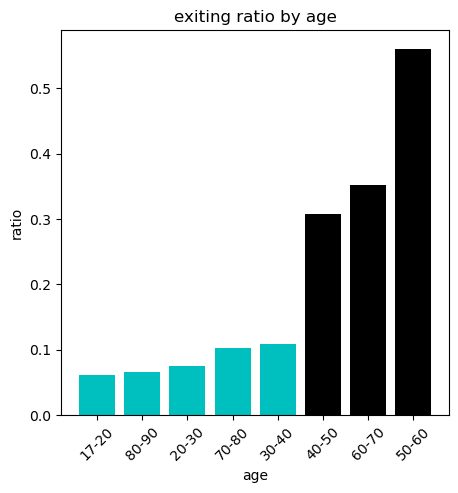

In [56]:
pltage = ages.drop(columns=['decade'])
plt.figure(figsize=(5,5))
plt.bar(pltage['age'],pltage['exiting_ratio'],color=['c','c','c','c','c','k','k','k'])
plt.title('exiting ratio by age')
plt.xticks(rotation=45)
plt.xlabel('age')
plt.ylabel('ratio')
plt.savefig('age.png')
plt.show()


### people between 40-60 years of age tend to exit more , having higher exiting ratio 

##  balance 

In [57]:
len(df.balance.unique())

6382

In [58]:
df.balance.max()

250898.09

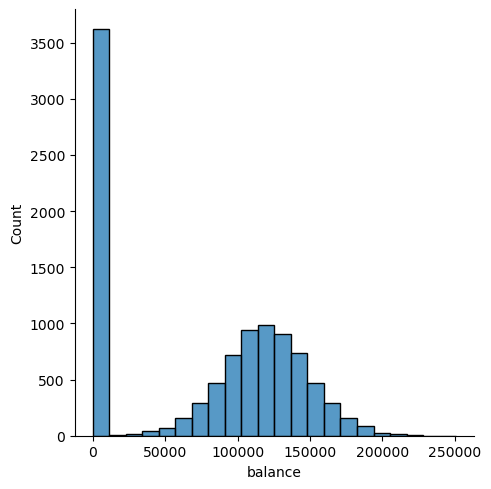

In [59]:
sns.displot(df.balance)

In [60]:
balance = df.balance.values
balance

array([     0.  ,  83807.86, 159660.8 , ...,      0.  ,  75075.31,
       130142.79])

In [61]:
# as we can see from the distribution graph balance goes from 0 to 250000 so we will split it in 25k bins

balance = df.balance.values

new_balance  = []
for i in range(len(balance)):
    if balance[i] >= 0 and balance[i] < 25000:
        x = 1
    elif balance[i] >= 25000 and balance[i]<50000:
        x = 2
    elif balance[i] >= 50000 and balance[i] < 75000:
        x = 3
    elif balance[i] >= 75000 and balance[i] < 100000:
        x = 4
    elif balance[i] >= 100000 and balance[i] < 125000:
        x = 5
    elif balance[i] >= 125000 and balance[i] < 150000:
        x = 6
    elif balance[i] >= 150000 and balance[i] < 175000:
        x = 7
    elif balance[i] >= 175000 and balance[i] < 200000:
        x = 8
    elif balance[i] >= 200000 and balance[i] < 225000:
        x = 9
    else:
        x = 10
    new_balance.append(x)

In [62]:
df['round_balance'] = new_balance

In [63]:
x = df.round_balance.value_counts()

In [64]:
y = df.loc[df['exited'] == 1,['round_balance']].value_counts().reset_index()

In [65]:
balances = pd.merge(x,y,on='round_balance')

In [66]:
balances

,round_balance,count_x,count_y
0,1,3623,504
1,5,2068,558
2,6,1762,429
3,4,1160,225
4,7,738,156
5,3,349,75
6,8,197,49
7,2,69,22
8,9,32,17
9,10,2,2


In [67]:
# ratio : 
balances = balances.values
balance_ratios = []
for i in range(len(balances)) : 
    x = balances[i][2]
    y = balances[i][1]
    ratio = x/y
    balance_ratios.append([balances[i][0],ratio])
    



In [68]:
balances = pd.DataFrame(balance_ratios,columns=['round_balance','ratio']).reset_index().sort_values('ratio',ascending=False)

In [69]:
balances

,index,round_balance,ratio
9,9,10,1.000
8,8,9,0.531
7,7,2,0.319
1,1,5,0.270
6,6,8,0.249
2,2,6,0.243
5,5,3,0.215
4,4,7,0.211
3,3,4,0.194
0,0,1,0.139


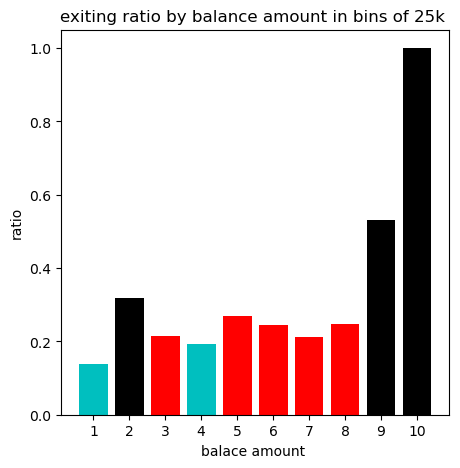

In [70]:

plt.figure(figsize=(5,5))
plt.bar(balances['round_balance'],balances['ratio'],color=['k','k','k','r','r','r','r','r','c','c','c'])
plt.title('exiting ratio by balance amount in bins of 25k ')
plt.xticks(balances['round_balance'])
plt.xlabel('balace amount ')
plt.ylabel('ratio')
plt.savefig('balance.png')
plt.show()

In [71]:
df.round_balance.value_counts()

round_balance
1     3623
5     2068
6     1762
4     1160
7      738
3      349
8      197
2       69
9       32
10       2
Name: count, dtype: int64

### what we can see here is that except for balance near zero the other balance data are distributed in a curved shape and we only have two persons with balance bigger or equal to 225000 who both left but we cant make a conclusion about that threshold because they are only two

### beside that, what we can say is that people with balance >= 150000  and people with balance between 25000-50000 tend to exit with the higher rate 

##  geography

In [72]:
geo = pd.crosstab(df.geography,df.exited,margins=True)

In [73]:
geo

exited,0,1,All
geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [74]:
lefted = geo[1].values[:-1]
lefted

array([810, 814, 413], dtype=int64)

In [75]:
total = geo.values[:,-1][:-1]
total

array([5014, 2509, 2477], dtype=int64)

In [76]:
cntrs = geo.index[:-1]
cntrs

Index(['France', 'Germany', 'Spain'], dtype='object', name='geography')

In [77]:
ratios = []

for i in range(len(total)):
    ratio = lefted[i]/total[i]
    ratios.append([ratio,cntrs[i]])
ratios

[[0.16154766653370561, 'France'],
 [0.32443204463929853, 'Germany'],
 [0.1667339523617279, 'Spain']]

In [78]:
ratios = pd.DataFrame(ratios,columns=['ratio','cntry'])

In [79]:
ratios

,ratio,cntry
0,0.162,France
1,0.324,Germany
2,0.167,Spain


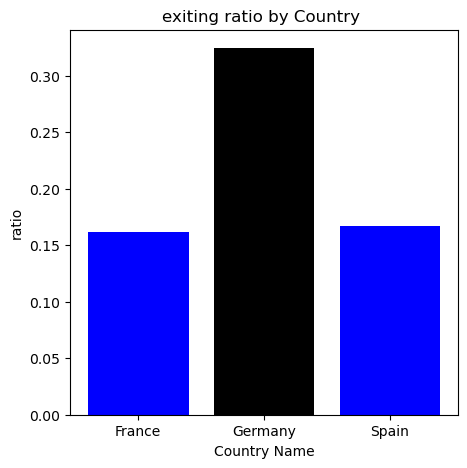

In [80]:

plt.figure(figsize=(5,5))
plt.bar(ratios['cntry'],ratios['ratio'],color=['b','k','b'])
plt.title('exiting ratio by Country ')
plt.xticks(ratios['cntry'])
plt.xlabel('Country Name')
plt.ylabel('ratio')
plt.savefig('country.png')
plt.show()

### here , we can see that people from germany tend to leave more with the higher exiting ratio equal to 32%


##  credit score 

In [81]:
print(f' credit score have {df.creditscore.nunique()} unique values , {df.creditscore.min()} , min value and {df.creditscore.max()} value')

 credit score have 460 unique values , 350 , min value and 850 value


#### so we will split the in bins of 100

In [82]:

credit = df.creditscore.values

new_credit  = []
for i in range(len(credit)):
    if credit[i] >= 350 and credit[i] < 450:
        x = 1
    elif credit[i] >= 450 and credit[i] <550:
        x = 2
    elif credit[i] >= 550 and credit[i] < 650:
        x = 3
    elif credit[i] >= 650 and credit[i] < 750:
        x = 4
    else:
        x = 5
    new_credit.append(x)

In [83]:
df['new_credit'] = new_credit

x = df.new_credit.value_counts()
y = df.loc[df['exited'] == 1,['new_credit']].value_counts().reset_index()
credits = pd.merge(x,y,on='new_credit')

In [84]:
credits

,new_credit,count_x,count_y
0,4,3477,667
1,3,3310,688
2,5,1623,321
3,2,1405,300
4,1,185,61


In [85]:
# ratio : 
credits = credits.values
credits_ratios = []
for i in range(len(credits)) : 
    x = credits[i][2]
    y = credits[i][1]
    ratio = x/y
    credits_ratios.append([credits[i][0],ratio])
    

credits = pd.DataFrame(credits_ratios,columns=['credits','ratio']).reset_index().sort_values('ratio',ascending=False)

In [86]:
credits

,index,credits,ratio
4,4,1,0.330
3,3,2,0.214
1,1,3,0.208
2,2,5,0.198
0,0,4,0.192


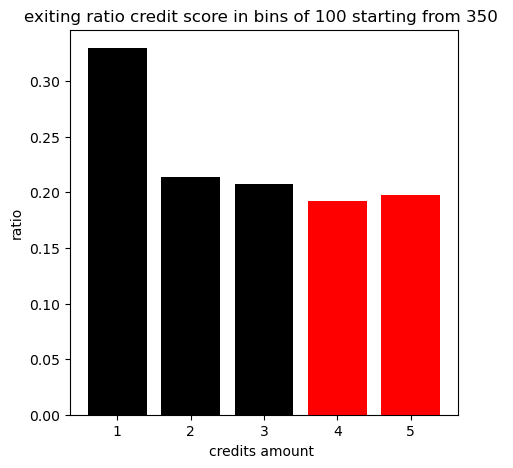

In [87]:

plt.figure(figsize=(5,5))
plt.bar(credits['credits'],credits['ratio'],color=['k','k','k','r','r'])
plt.title('exiting ratio credit score in bins of 100 starting from 350 ')
plt.xticks(credits['credits'])
plt.xlabel('credits amount ')
plt.ylabel('ratio')
plt.savefig('credits.png')
plt.show()

### here we can say that the lower the credit score the more likely is somoane to exit and people with credit score close to 350-450 tend to exit more with an exit ratio of 0.32

## number of products 

In [88]:
print(f' credit score have {df.numofproducts.nunique()} unique values , {df.numofproducts.min()}  min value and {df.numofproducts.max()}  max value')

 credit score have 4 unique values , 1  min value and 4  max value


In [89]:
products = pd.crosstab(df.numofproducts,df.exited,margins=True)

In [90]:
products

exited,0,1,All
numofproducts,,,
1,3675,1409,5084
2,4242,348,4590
3,46,220,266
4,0,60,60
All,7963,2037,10000


In [91]:

lefted = products[1].values[:-1]
total = products.values[:,-1][:-1]
num_ = products.index[:-1]


In [92]:
ratios = []
nums = []

for i in range(len(total)):
    ratio = lefted[i]/total[i]
    ratios.append(ratio)
    nums.append(num_[i])
ratios = pd.DataFrame({'ratio':ratios,'number':nums})

In [93]:
ratios

,ratio,number
0,0.277,1
1,0.076,2
2,0.827,3
3,1.000,4


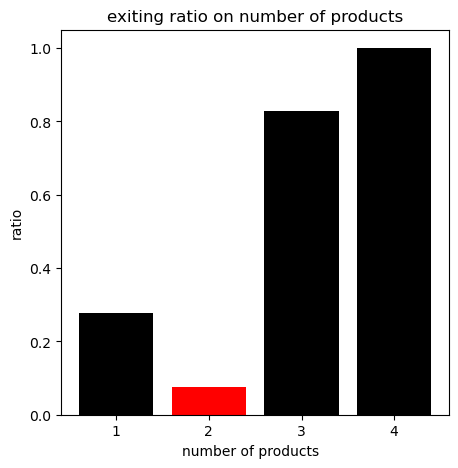

In [94]:
plt.figure(figsize=(5,5))
plt.bar(ratios['number'],ratios['ratio'],color=['k','r','k','k'])
plt.title('exiting ratio on number of products')
plt.xticks(ratios['number'])
plt.xlabel('number of products  ')
plt.ylabel('ratio')
plt.savefig('products.png')
plt.show()

### here we can see that all 40 people with 4 products exitited, people with 3 products have a high exiting ratio  = 0.82 and also people with one product tend to leave with ratio .27

## is acive member 

In [95]:
active  = pd.crosstab(df.isactivemember,df.exited,margins=True)

In [96]:
active

exited,0,1,All
isactivemember,,,
0,3547,1302,4849
1,4416,735,5151
All,7963,2037,10000


In [97]:

lefted = active[1].values[:-1]
total = active.values[:,-1][:-1]
active = active.index[:-1]


In [98]:
ratios = []
actives = []

for i in range(len(total)):
    ratio = lefted[i]/total[i]
    ratios.append(ratio)
    actives.append(active[i])
ratios = pd.DataFrame({'ratio':ratios,'actives':actives})

In [99]:
ratios['actives'].replace((0,1),('non_active','active'),inplace=True)

In [100]:
ratios

,ratio,actives
0,0.269,non_active
1,0.143,active


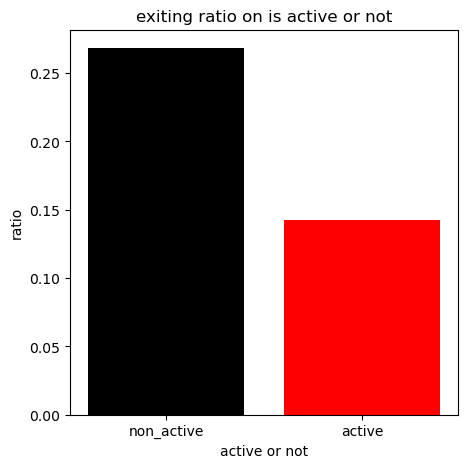

In [101]:
plt.figure(figsize=(5,5))
plt.bar(ratios['actives'],ratios['ratio'],color=['k','r'])
plt.title('exiting ratio on is active or not')
plt.xticks(ratios['actives'])
plt.xlabel('active or not')
plt.ylabel('ratio')
plt.savefig('active.png')
plt.show()

### non active mebers tend to exit more as expected with exiting rate of 0.26

## now its time to make predictions but first, we have to prepare the data

In [102]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [105]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


In [106]:
# standardise the data

from sklearn.preprocessing import StandardScaler as ss

scaler = ss()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##  lets make a function for the metrics of each model 


In [107]:
from sklearn.metrics import accuracy_score , f1_score , recall_score,precision_score,confusion_matrix 
history = []
hist_df = []

def metrics(estimator,pred,actual,hist = history,hist_df = hist_df):
    new = []
    n_df = []
    
    accuracy = accuracy_score(pred,actual)
    f1 = f1_score(pred,actual)
    recall = recall_score(pred,actual)
    precision = precision_score(pred,actual) 
    
    cm = confusion_matrix(pred,actual)
    x = cm[0][0]
    y =cm[1][0]
    

    
    new.append(f'{estimator} have {accuracy} accuracy , {f1} f1 score , {recall} recall {precision} precision ')
    print(new)
    n_df.append((estimator,accuracy,f1,recall,precision))
    history.append(new)
    hist_df.append(n_df)

    
    
    

## a function for gridsearch cv to find the best parameters for each model

In [108]:
from sklearn.model_selection import GridSearchCV

def grid(parameters , estimator, x = x_train,y = y_train):
    grid_s = GridSearchCV(estimator=estimator,param_grid=parameters,scoring='accuracy',cv=8,n_jobs=-1,refit=False)
    grid_s.fit(x,y)
    best_acc = grid_s.best_score_
    best_params = grid_s.best_params_
    print(f'best accuracy score  = {best_acc}')
    print(f'best params = {best_params}')

In [109]:
#ignore warnings

import warnings 

warnings.filterwarnings("ignore")


## DecisionTreeClassifier 

In [110]:
params = {'criterion':['gini','entropy','log_loss'],'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,2,3,4],'min_samples_split':[1,2,3,4]}


from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()

grid(params,tree)

best accuracy score  = 0.828375
best params = {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [111]:
tree = DecisionTreeClassifier(criterion='log_loss', max_features='log2', min_samples_leaf=4, min_samples_split= 4)
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_features='log2',
                       min_samples_leaf=4, min_samples_split=4)

In [112]:
preds_tree = tree.predict(x_test)
metrics(tree,preds_tree,y_test)

["DecisionTreeClassifier(criterion='log_loss', max_features='log2',\n                       min_samples_leaf=4, min_samples_split=4) have 0.8085 accuracy , 0.48590604026845635 f1 score , 0.530791788856305 recall 0.44801980198019803 precision "]


## NearestNeighbors

In [113]:
params = {'n_neighbors':[3,4,5,6,7],'algorithm':['auto','ball_tree','kd_tree','brute']}

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier()

grid(params,neighbors)

best accuracy score  = 0.8382499999999999
best params = {'algorithm': 'auto', 'n_neighbors': 7}


In [114]:
neighbors = KNeighborsClassifier(algorithm='auto',n_neighbors=7)
neighbors.fit(x_train,y_train)
neighbors_preds = neighbors.predict(x_test)
metrics(neighbors,neighbors_preds,y_test)

['KNeighborsClassifier(n_neighbors=7) have 0.8265 accuracy , 0.4569640062597809 f1 score , 0.6212765957446809 recall 0.3613861386138614 precision ']



## RandomForestClassifier

In [115]:
params = {'n_estimators':[50,100,150],'criterion':['gini','entropy','log_loss'],'min_samples_split':[1,2,3]}

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

grid(params,forest)

best accuracy score  = 0.8625
best params = {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 100}


In [116]:
forest = RandomForestClassifier(criterion='gini',min_samples_split=2,n_estimators=100)
forest.fit(x_train,y_train)
forest_preds = neighbors.predict(x_test)
metrics(forest,forest_preds,y_test)

['RandomForestClassifier() have 0.8265 accuracy , 0.4569640062597809 f1 score , 0.6212765957446809 recall 0.3613861386138614 precision ']


##  LogisticRegression

In [117]:
params = {'penalty':['l1','l2'],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky']}

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
grid(params,logistic)

best accuracy score  = 0.812125
best params = {'penalty': 'l1', 'solver': 'liblinear'}


In [118]:
logistic = LogisticRegression(penalty='l1',solver='liblinear')
logistic.fit(x_train,y_train)
logistic_pred = neighbors.predict(x_test)
metrics(logistic,logistic_pred,y_test)

["LogisticRegression(penalty='l1', solver='liblinear') have 0.8265 accuracy , 0.4569640062597809 f1 score , 0.6212765957446809 recall 0.3613861386138614 precision "]


## naive_bayes


In [119]:

from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train,y_train)
naive_preds = naive.predict(x_test)
metrics(naive,naive_preds,y_test)

['GaussianNB() have 0.8315 accuracy , 0.4199655765920826 f1 score , 0.6892655367231638 recall 0.30198019801980197 precision ']


## AdaBoostClassifier

In [120]:
params ={'n_estimators':[50,75,90],'learning_rate':[1.0,0.1,0.01]}
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
grid(params,adaboost)


best accuracy score  = 0.85175
best params = {'learning_rate': 1.0, 'n_estimators': 50}


In [121]:
adaboost = AdaBoostClassifier(learning_rate=1.0,n_estimators=50)
adaboost.fit(x_train,y_train)
adaboost_preds = adaboost.predict(x_test)
metrics(adaboost,adaboost_preds,y_test)

['AdaBoostClassifier() have 0.8625 accuracy , 0.6020260492040521 f1 score , 0.7247386759581882 recall 0.5148514851485149 precision ']


## GradientBoostingClassifier

In [122]:
params = {'loss':['log_loss','exponential'],'learning_rate':[1.0,0.1,0.01],'n_estimators':[100,120,150],'min_samples_split':[2,3,1,4]}

from sklearn.ensemble import GradientBoostingClassifier
gradientboost = GradientBoostingClassifier()
grid(params,gradientboost)


best accuracy score  = 0.863
best params = {'learning_rate': 0.1, 'loss': 'log_loss', 'min_samples_split': 2, 'n_estimators': 100}


In [123]:
gradientboost = GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,min_samples_split=3,loss='log_loss')
gradientboost.fit(x_train,y_train)
gradientboost_preds = gradientboost.predict(x_test)
metrics(gradientboost,gradientboost_preds,y_test)

['GradientBoostingClassifier(min_samples_split=3, n_estimators=150) have 0.868 accuracy , 0.6071428571428572 f1 score , 0.7611940298507462 recall 0.504950495049505 precision ']


## artificial neural network

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *


In [125]:
model = Sequential()
model.add(Input(10,))
model.add(Dense(100,'relu'))
model.add(BatchNormalization())
model.add(Dense(100,'relu',kernel_regularizer=('l1_l2')))
model.add(BatchNormalization())
model.add(Dense(50,'relu',kernel_regularizer=('l1_l2')))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50,'relu',kernel_regularizer=('l1_l2')))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,'sigmoid'))
          
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_2 (Bat  (None, 50)                

In [126]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [127]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


250/250 [==============================] - 7s 7ms/step - loss: 10.3424 - accuracy: 0.7370
Epoch 2/50
250/250 [==============================] - 2s 9ms/step - loss: 2.0302 - accuracy: 0.8092
Epoch 3/50
250/250 [==============================] - 1s 6ms/step - loss: 0.9649 - accuracy: 0.8112
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.6973 - accuracy: 0.8186
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.5926 - accuracy: 0.8234
Epoch 6/50
250/250 [==============================] - 1s 5ms/step - loss: 0.5103 - accuracy: 0.8331
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 0.4916 - accuracy: 0.8311
Epoch 8/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4756 - accuracy: 0.8396
Epoch 9/50
250/250 [==============================] - 1s 5ms/step - loss: 0.4564 - accuracy: 0.8374
Epoch 10/50
250/250 [==============================] - 1s 6ms/step - loss: 0.4420 - accuracy: 0.8

In [128]:
ann_preds = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [129]:
ann_preds

y_preds = []
for i in range(len(ann_preds)):
    if ann_preds[i] > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)
        

In [130]:
metrics(model,y_preds,y_test)

['<keras.src.engine.sequential.Sequential object at 0x0000023129476210> have 0.8605 accuracy , 0.5903083700440529 f1 score , 0.7256317689530686 recall 0.4975247524752475 precision ']


## compare the models and pick the best one 

In [131]:
mm = []
for i in hist_df:
    for j in i:
        aa = []
        for k in j :
            aa.append(k)
    mm.append(aa)

In [132]:
models = pd.DataFrame(mm,columns=['model','accuracy','f1_score','recall','precision'])
models = models.sort_values('accuracy',ascending=False)

In [133]:
models

,model,accuracy,f1_score,recall,precision
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.868,0.607,0.761,0.505
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.863,0.602,0.725,0.515
7,<keras.src.engine.sequential.Sequential object...,0.861,0.590,0.726,0.498
4,GaussianNB(),0.832,0.420,0.689,0.302
1,KNeighborsClassifier(n_neighbors=7),0.827,0.457,0.621,0.361
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.827,0.457,0.621,0.361
3,"LogisticRegression(penalty='l1', solver='libli...",0.827,0.457,0.621,0.361
0,"DecisionTreeClassifier(criterion='log_loss', m...",0.808,0.486,0.531,0.448


In [138]:

models['model'][6]


GradientBoostingClassifier(min_samples_split=3, n_estimators=150)

## lets choose the best model 

In [134]:
y_pred = gradientboost.predict(x_test)

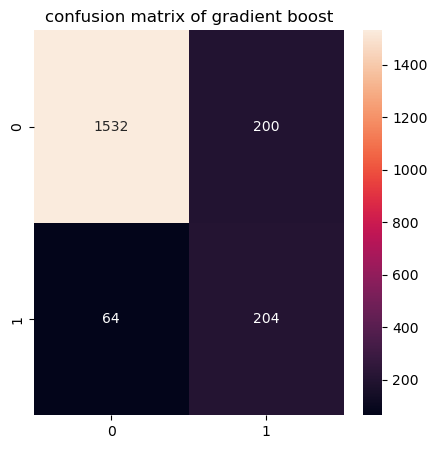

In [135]:


from sklearn.metrics import confusion_matrix as cm
matrix = cm(y_pred,y_test)
plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True,fmt='0')
plt.title('confusion matrix of gradient boost')
plt.show()

### we have an accuracy of 86.8% 
### our results are good 
### we can keep the model 
### lets save it to an external file for later use 

In [136]:
model_json = model.to_json()
with open("gradientboost.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("gradientboost.h5")
print("Saved model to disk")

Saved model to disk
